**Importing the required libraries**

In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Importing the dataset**

In [31]:
data = pd.read_csv("Unemployment in India.csv")
data = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

Show top five records

In [32]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


**Show last five records**

In [33]:
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855
266,West Bengal,31-10-2020,M,9.98,33962549,45.63,East,22.9868,87.855


In [34]:
#to print columns
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [35]:
#rename the columns 
data.columns = ['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [36]:
data.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [37]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


**Shape of the dataset**

In [38]:
data.shape

(267, 9)

**Summary of the dataset**

In [39]:
#Display summary statistics for a dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,1.223693e+01,1.080328e+01,0.5000,4.845000e+00,9.650000e+00,1.675500e+01,7.585000e+01
Estimated Employed,267.0,1.396211e+07,1.336632e+07,117542.0000,2.838930e+06,9.732417e+06,2.187869e+07,5.943376e+07
Estimated Labour Participation Rate,267.0,4.168157e+01,7.845419e+00,16.7700,3.726500e+01,4.039000e+01,4.405500e+01,6.969000e+01
longitude,267.0,2.282605e+01,6.270731e+00,10.8505,1.811240e+01,2.361020e+01,2.727840e+01,3.377820e+01
latitude,267.0,8.053242e+01,5.831738e+00,71.1924,7.608560e+01,7.901930e+01,8.527990e+01,9.293760e+01


**Check the Datatypes in the dataset**

In [40]:
#checking the null and dtypes in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   longitude                            267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [41]:
data.isnull().sum().sum()

0

#**EXPLORING DATA**

In [42]:
#define numerical and categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

#print columns
print("we have {} numerical features : {}".format(len(numeric_features),numeric_features))
print("we have {} categorical features : {}".format(len(categorical_features),categorical_features))

we have 5 numerical features : ['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'longitude', 'latitude']
we have 4 categorical features : ['States', 'Date', 'Frequency', 'Region']


In [43]:
#proportion of count data on categorical columns
for col in categorical_features:
  print(data[col].value_counts(normalize=True) * 100)
  print('-------------------------------')

Andhra Pradesh      3.745318
Assam               3.745318
Uttarakhand         3.745318
Uttar Pradesh       3.745318
Tripura             3.745318
Telangana           3.745318
Tamil Nadu          3.745318
Rajasthan           3.745318
Punjab              3.745318
Puducherry          3.745318
Odisha              3.745318
Meghalaya           3.745318
Maharashtra         3.745318
Madhya Pradesh      3.745318
Kerala              3.745318
Karnataka           3.745318
Jharkhand           3.745318
Himachal Pradesh    3.745318
Haryana             3.745318
Gujarat             3.745318
Goa                 3.745318
Delhi               3.745318
Chhattisgarh        3.745318
Bihar               3.745318
West Bengal         3.745318
Jammu & Kashmir     3.370787
Sikkim              2.996255
Name: States, dtype: float64
-------------------------------
 31-03-2020    10.112360
 31-05-2020    10.112360
 30-06-2020    10.112360
 31-07-2020    10.112360
 31-08-2020    10.112360
 30-09-2020    10.112360
 31-10

#**UNIVARIATE ANALYSIS**


Numerical Features

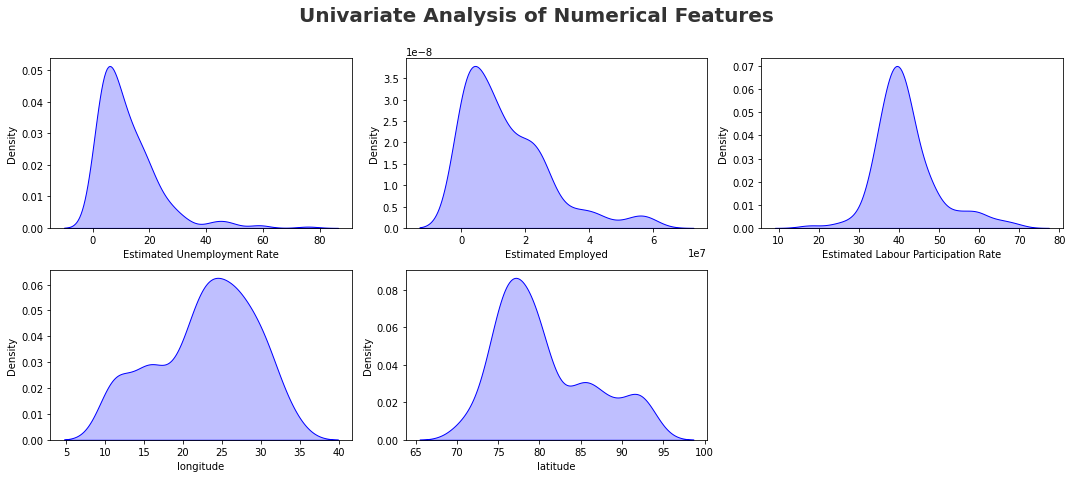

In [44]:

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8,y=1.0)

for i in range(0, len(numeric_features)):
  plt.subplot(5, 3, i+1)
  sns.kdeplot(x=data[numeric_features[i]],shade=True, color='b')
  plt.xlabel(numeric_features[i])
  plt.tight_layout()

#Categorical Features

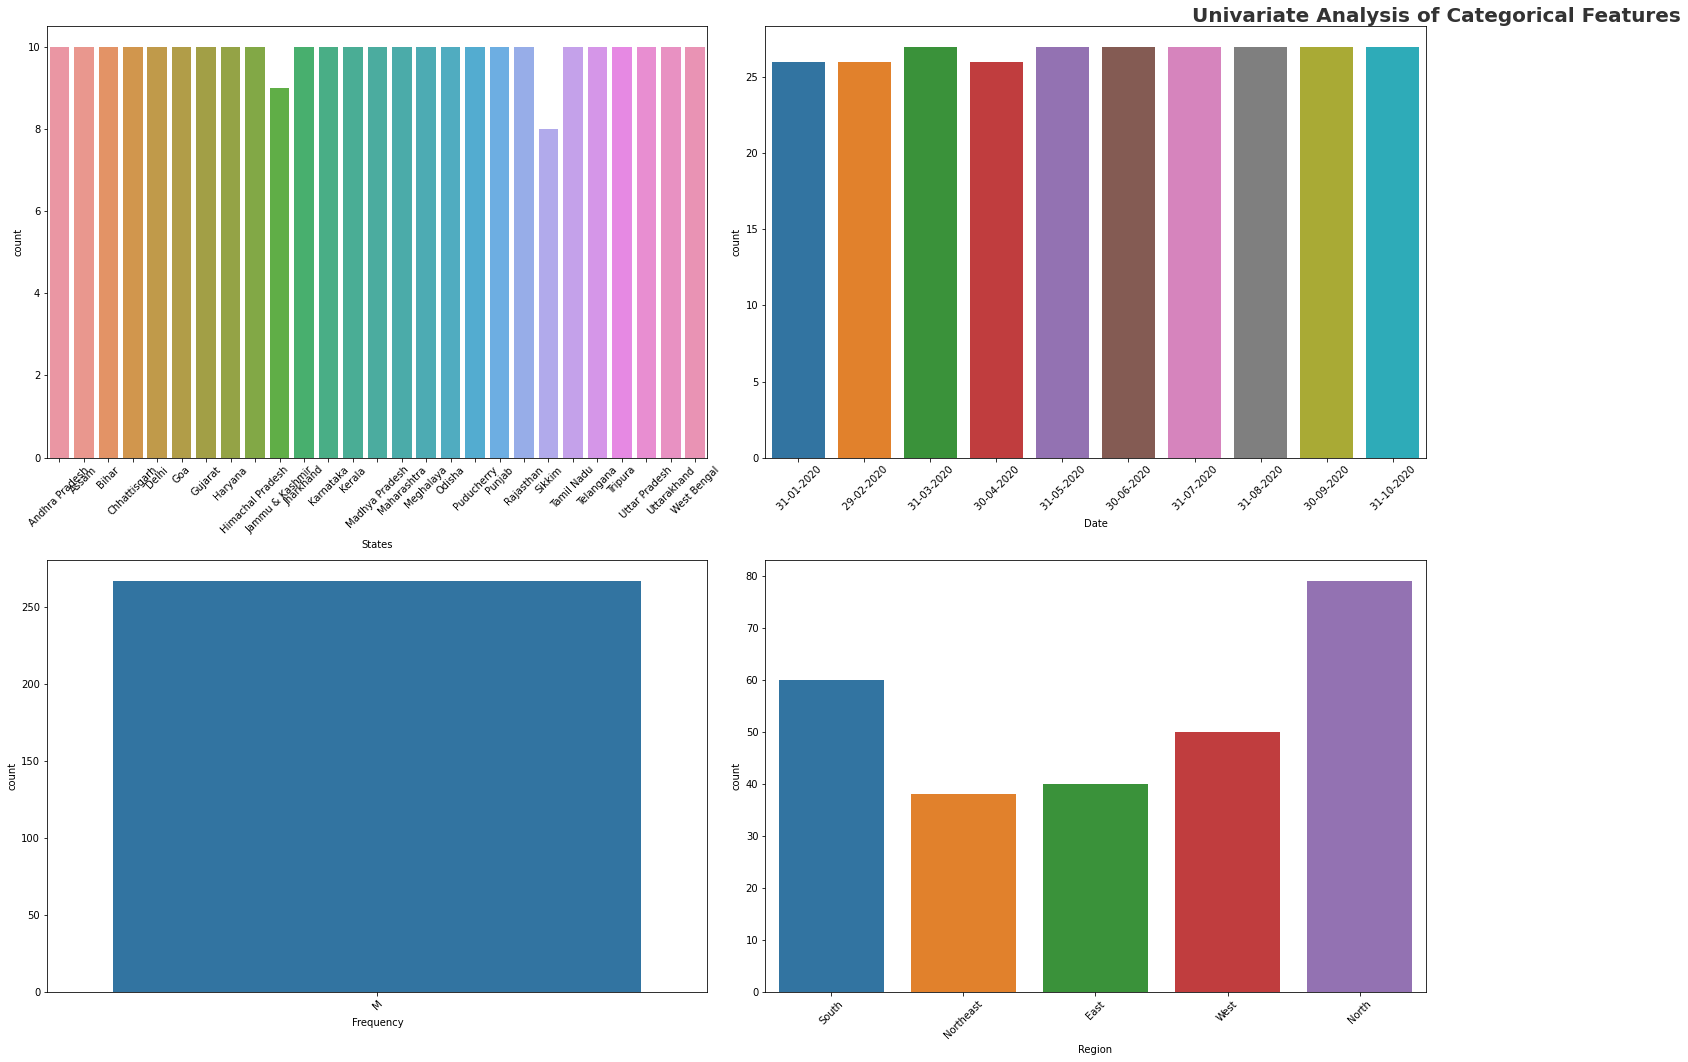

In [45]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, x=1.0)

for i in range(0, len(categorical_features)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=data[categorical_features[i]])
  plt.xlabel(categorical_features[i])
  plt.xticks(rotation=45)
  plt.tight_layout()

**correlation the dataset**

In [46]:
data.corr()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
Estimated Unemployment Rate,1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate,-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


**Covariance of the dataset**

In [47]:
data.cov()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
Estimated Unemployment Rate,1.167109e+02,-3.540343e+07,-6.232968e+00,1.016003e+01,-1.510561e+00
Estimated Employed,-3.540343e+07,1.786585e+14,-5.028066e+06,-9.526938e+06,-9.300939e+06
Estimated Labour Participation Rate,-6.232968e+00,-5.028066e+06,6.155061e+01,3.954037e+00,1.820198e+01
longitude,1.016003e+01,-9.526938e+06,3.954037e+00,3.932206e+01,4.603878e+00
latitude,-1.510561e+00,-9.300939e+06,1.820198e+01,4.603878e+00,3.400916e+01


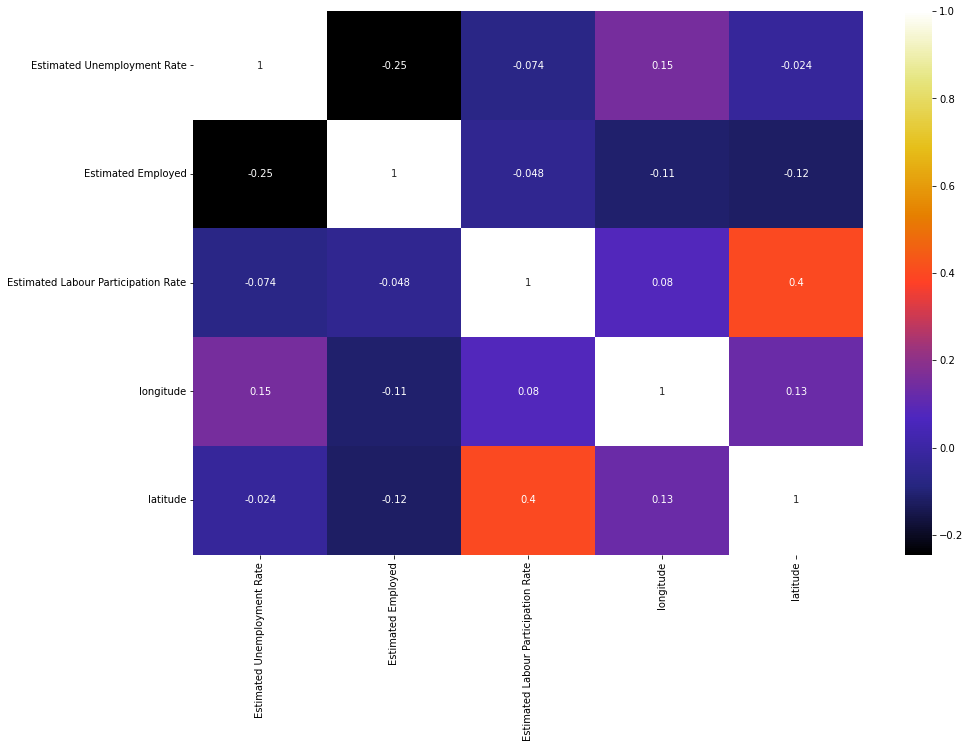

In [50]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), cmap = "CMRmap",annot = True)
plt.show()

Look at the estimated number of employes according to different regions of indians

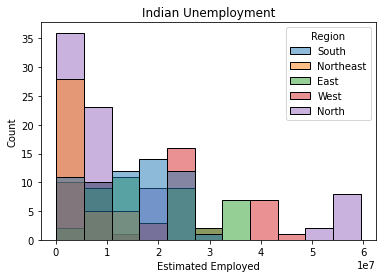

In [63]:
data.columns = ["States","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=data)
plt.show()

see the unemploymnet rate rate according to different regions of India

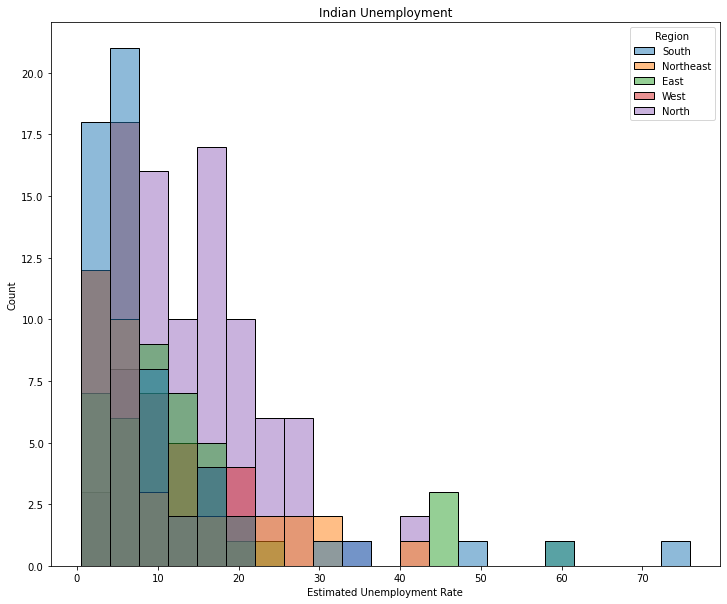

In [65]:
plt.figure(figsize=(12,10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=data)
plt.show()

Create a dashboard to analyze the unempoyment rate of each Indian state by region   use sunburst plot.

In [68]:
unemployment = data[["States","Region","Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment,path=["Region","States"],
                     values="Estimated Unemployment Rate",
                     width = 700, height = 700, color_continuous_scale="RdY16n",
                     title= "Unemploment Rate in India")
figure.show()